<a href="https://colab.research.google.com/github/vlad98rus/-netology_pyda/blob/HomeWork-1/%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Марковские случайные процессы"

— Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

— Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [2]:
pip install hmmlearn

     |████████████████████████████████| 368kB 2.7MB/s 


In [3]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM

%matplotlib inline
sns.set()

In [4]:
with open('TolstoyLev_VoynaIMir_tom1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)

In [5]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [6]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [7]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [8]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [9]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

### Матрица переходных вероятностей

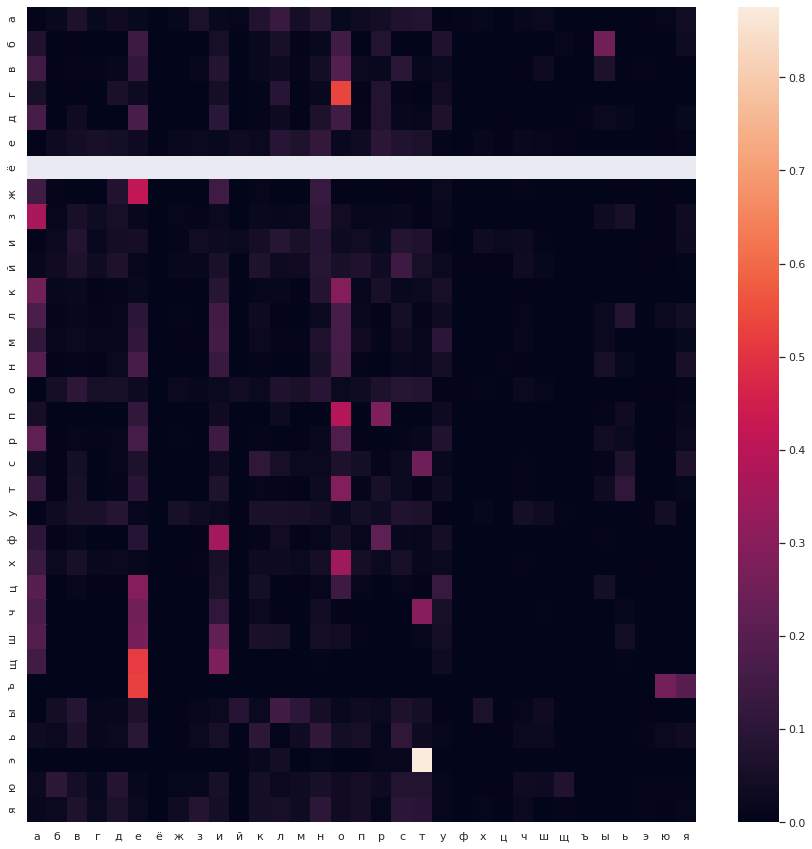

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df)
plt.show()

### Вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [11]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)

паар 2.547545243322798e-07
пабр 2.146667655447307e-06
павр 1.8583700628697537e-06
пагр 2.2786001191850735e-06
падр 4.320623190576904e-06
паер 2.877480680375452e-06
пажр 2.1278990041774906e-09
пазр 1.312617668058892e-06
паир 5.423214614255591e-07
пайр 5.644364878480318e-07
пакр 6.583799448149369e-06
палр 1.1997188479876228e-06
памр 6.025766840200911e-07
панр 3.977338842341425e-07
паор 1.9129302864905798e-06
папр 1.3049346215370881e-05
парр 1.0876639955847687e-07
паср 8.959579723993165e-07
патр 6.766454138408345e-06
паур 3.2244085450785337e-07
пафр 2.939553262363832e-06
пахр 5.172315651560583e-07
пацр 2.9993926730976475e-09
пачр 6.539154509011177e-08
пашр 2.248962901901626e-08
пащр 5.630626602075052e-09
паэр 7.514594553413136e-08
паюр 4.6914688278068984e-07
паяр 7.705695518935896e-07
пбар 3.483754597647501e-09
пббр 1.0764164423595634e-10
пбвр 1.1792568521576925e-10
пбгр 5.927123634732714e-11
пбдр 1.3581924584971456e-10
пбер 1.5138067730379713e-08
пбжр 5.971230153540564e-14
пбзр 3.8469058

### Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [12]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бейсмиоша


### Возьмите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [13]:
series = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")["Count"]

In [14]:
values = series.values.reshape(-1,1)

In [15]:
model = GaussianHMM(n_components=20,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

Fitting a model with 439 free scalar parameters with only 77 data points will result in a degenerate solution.


In [16]:
cur_value = labels[-1]
predictions = []
for _ in range(20):
    cur_value = np.random.choice(20, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [17]:
new_series = np.concatenate((values, np.array(predictions)))

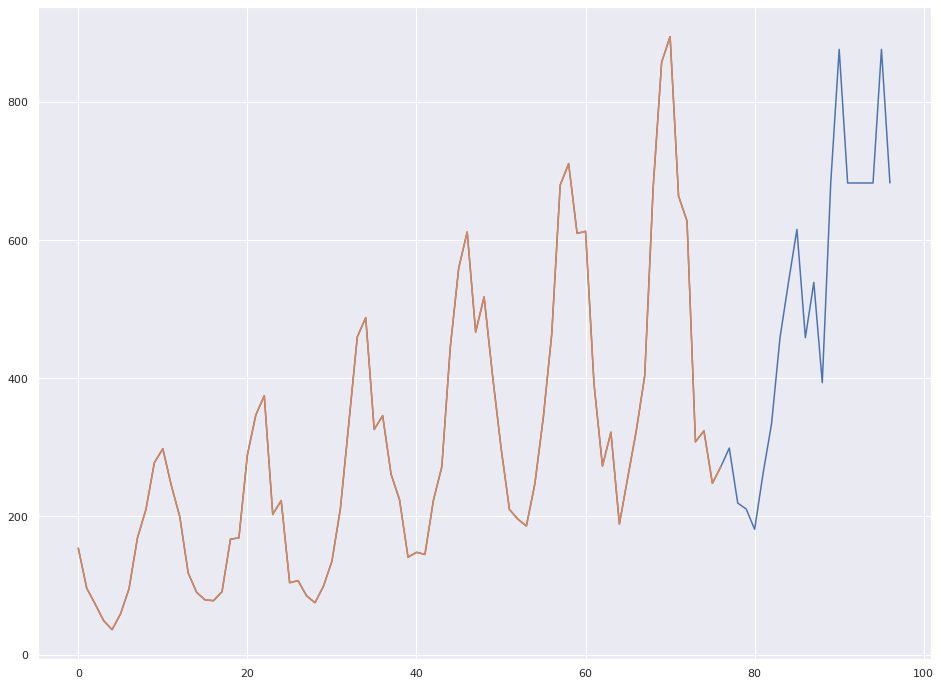

In [18]:
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()